In [ ]:
# First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images 
# (in the camera_cal folder in the repository).

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
nx = 9
ny = 6

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
len(images)

20

In [5]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    print(fname)
    st = datetime.now()
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found/'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
    print('runtime: {}'.format(datetime.now()-st))        

camera_cal/calibration1.jpg
runtime: 0:00:00.219350
camera_cal/calibration10.jpg
runtime: 0:00:00.311679
camera_cal/calibration11.jpg
runtime: 0:00:00.465967
camera_cal/calibration12.jpg
runtime: 0:00:00.216411
camera_cal/calibration13.jpg
runtime: 0:00:00.228768
camera_cal/calibration14.jpg
runtime: 0:00:00.220337
camera_cal/calibration15.jpg
runtime: 0:00:00.243646
camera_cal/calibration16.jpg
runtime: 0:00:00.216300
camera_cal/calibration17.jpg
runtime: 0:00:00.172749
camera_cal/calibration18.jpg
runtime: 0:00:00.161125
camera_cal/calibration19.jpg
runtime: 0:00:00.258903
camera_cal/calibration2.jpg
runtime: 0:00:00.060729
camera_cal/calibration20.jpg
runtime: 0:00:00.403990
camera_cal/calibration3.jpg
runtime: 0:00:00.059159
camera_cal/calibration4.jpg
runtime: 0:00:00.320924
camera_cal/calibration5.jpg
runtime: 0:00:00.260596
camera_cal/calibration6.jpg
runtime: 0:00:00.320935
camera_cal/calibration7.jpg
runtime: 0:00:00.243402
camera_cal/calibration8.jpg
runtime: 0:00:00.256464
c

In [6]:
import pickle
%matplotlib inline

In [7]:
# Test undistortion on an image
testfname = 'camera_cal/calibration3.jpg'
img = cv2.imread(testfname)
img_size = (img.shape[1], img.shape[0])
img_size

(1280, 720)

In [8]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [9]:
ret, mtx

(1.1868973603423718,
 array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
        [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]))

In [10]:
# k1, k2, p1, p2, k3. 
# k for radial distortion (curved lenses), p for tangential distortion (image plane not alingned with lens)
dist

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [11]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist.jpg',dst)

True

In [12]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_pickle.p", "wb" ) )

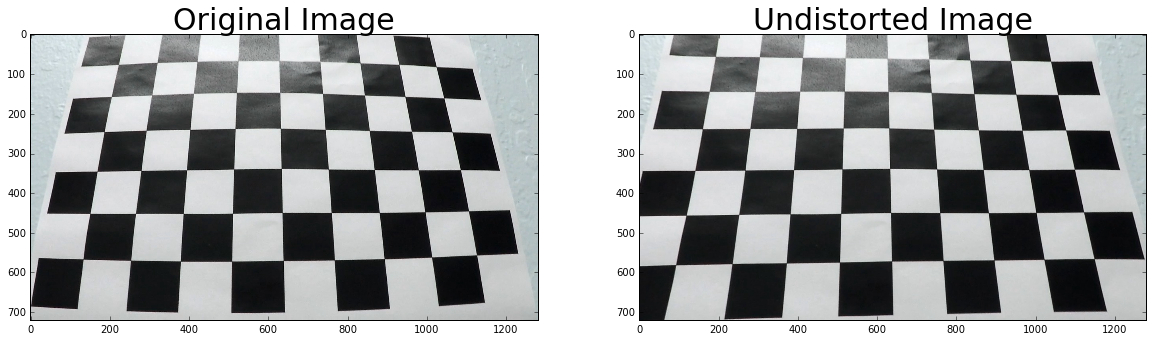

In [13]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(dst);
ax2.set_title('Undistorted Image', fontsize=30);

In [14]:
import matplotlib.image as mpimg

In [15]:
#Next, for a series of test images (in the test_images folder in the repository):
#
#Apply the distortion correction to the raw image.
#Use color transforms, gradients, etc., to create a thresholded binary image.
#Apply a perspective transform to rectify binary image ("birds-eye view").
#Detect lane pixels and fit to find lane boundary.
#Determine curvature of the lane and vehicle position with respect to center.
#Warp the detected lane boundaries back onto the original image.
#Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [16]:
image = mpimg.imread('test_images/test5.jpg')

In [17]:
#Apply the distortion correction to the raw image.
# inputs:
#   img  -- input image
#   mtx  -- camera matrix from calibrateCamera
#   dist -- distortion coefficients from calibrateCamera
def undistort(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [18]:
undist = undistort(image, mtx, dist)

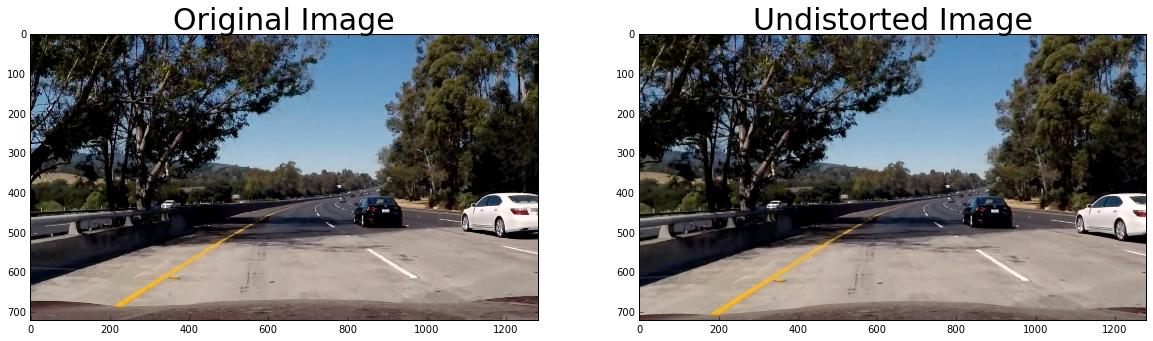

In [19]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(undist);
ax2.set_title('Undistorted Image', fontsize=30);

In [20]:
image = undist

In [21]:
# Apply Sobel along x or y axis to img.
# Then takes an absolute value and apply thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     orient       -- 'x' or 'y'
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_abs_thresholds(img, orient='x', kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [22]:
# Applies Sobel along x and y.
# Computes the magnitude of the gradient and applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_magnitude_thresholds(img, kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [23]:
# Applies Sobel along x and y, then computes the direction of the gradient for absolute sobel values.
# Applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_graddir_thresholds(img, kernel_size=3, thresholds=(0., np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    sobel_grad = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output = np.zeros_like(sobel_grad).astype(np.uint8)
    binary_output[(sobel_grad >= thresholds[0]) & (sobel_grad <= thresholds[1])] = 1
    return binary_output

In [24]:
# Converts image to HLS color space.
# Applies thresholds to the S-channel.
# Returns binary image.
#   inputs
#     img          -- input image
#     thresholds   -- two values for low and high thresholds
def hls_s_thresholds(img, thresholds=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) 
    s = hls[:,:,2]
    binary_output = np.zeros_like(s)
    binary_output[(s >= thresholds[0]) & (s <= thresholds[1])] = 1
    return binary_output

In [35]:
sx_kernel = 3
sx_thresh = (30, 100)
sx_binary = sobel_abs_thresholds(image, orient='x', kernel_size=sx_kernel, thresholds=sx_thresh)

sy_kernel = 3
sy_thresh = (30, 100)
sy_binary = sobel_abs_thresholds(image, orient='y', kernel_size=sy_kernel, thresholds=sy_thresh)

smag_kernel = 5
smag_thresh = (30,100)
smag_binary = sobel_magnitude_thresholds(image, kernel_size=smag_kernel, thresholds=smag_thresh)

sgraddir_kernel = 7
sgraddir_thresh = (0.7, 1.3)
sgraddir_binary = sobel_graddir_thresholds(image, kernel_size=sgraddir_kernel, thresholds=sgraddir_thresh)

s_thresh = (170,255)
s_binary = hls_s_thresholds(image, thresholds=s_thresh)

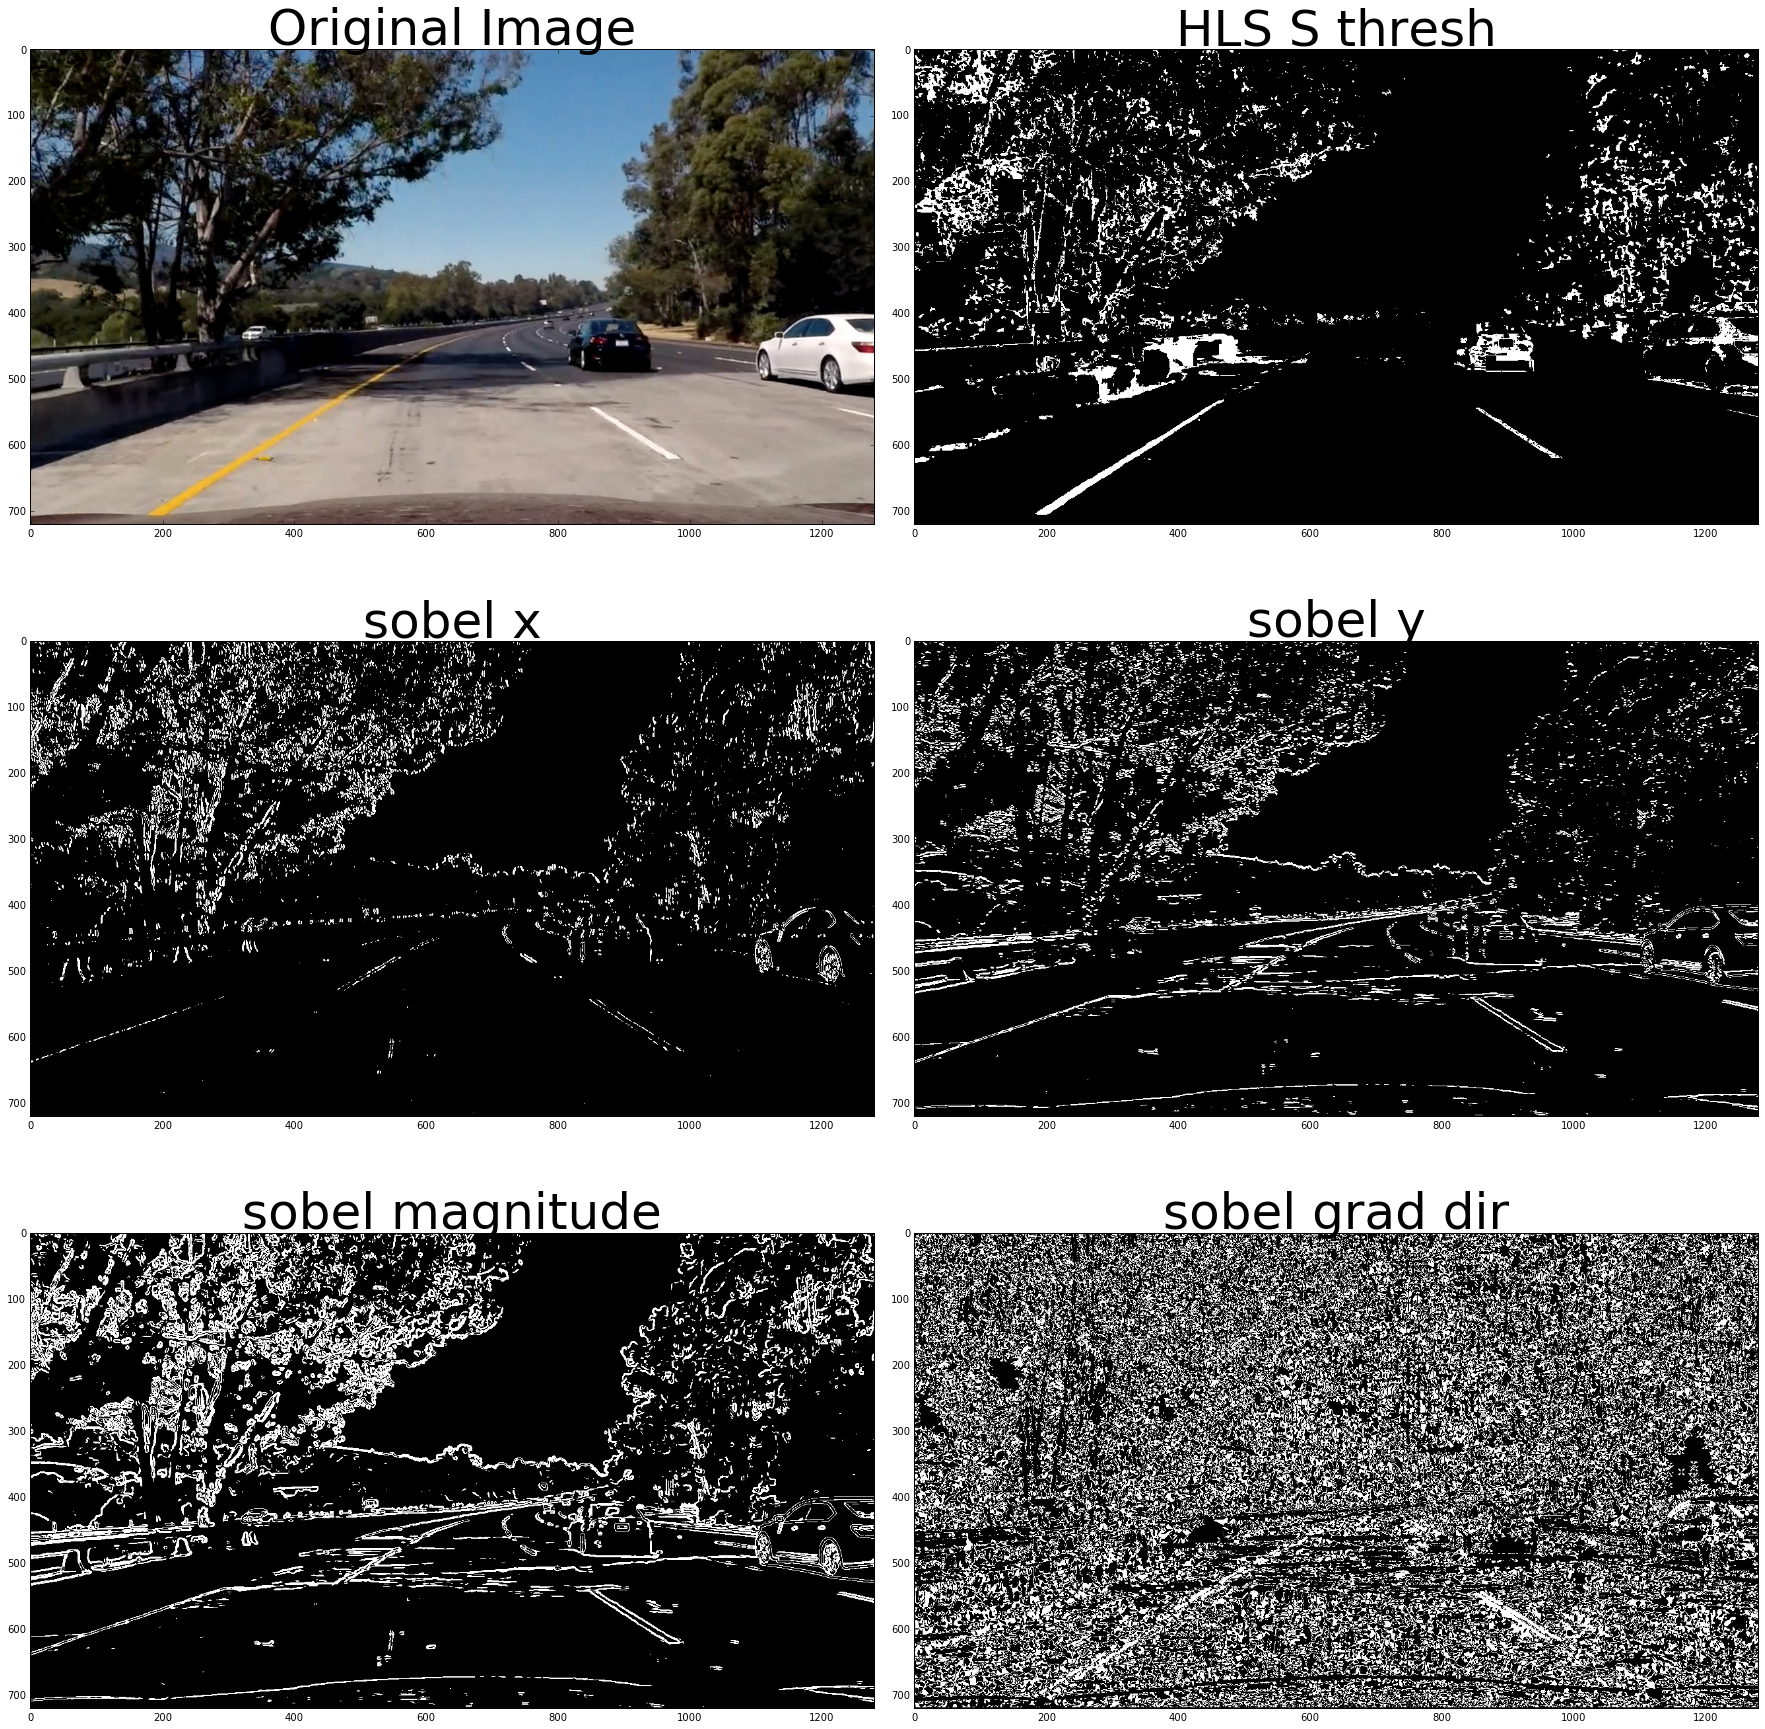

In [36]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(24, 27))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(s_binary, cmap='gray')
ax2.set_title('HLS S thresh', fontsize=50)

ax3.imshow(sx_binary, cmap='gray')
ax3.set_title('sobel x', fontsize=50)
ax4.imshow(sy_binary, cmap='gray')
ax4.set_title('sobel y', fontsize=50)

ax5.imshow(smag_binary, cmap='gray')
ax5.set_title('sobel magnitude', fontsize=50)
ax6.imshow(sgraddir_binary, cmap='gray')
ax6.set_title('sobel grad dir', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [37]:
merge1 = np.dstack(( np.zeros_like(sx_binary), sx_binary, sy_binary)).astype(np.float32)
merge2 = np.dstack(( np.zeros_like(smag_binary), smag_binary, sgraddir_binary)).astype(np.float32)
merge3 = np.dstack(( np.zeros_like(smag_binary), sgraddir_binary, s_binary)).astype(np.float32)


In [38]:
merge1 = np.dstack(( sx_binary, sy_binary, smag_binary)).astype(np.float32)
merge2 = np.dstack(( smag_binary, sgraddir_binary, s_binary)).astype(np.float32)
merge3 = np.dstack(( np.zeros_like(smag_binary), sgraddir_binary, s_binary)).astype(np.float32)


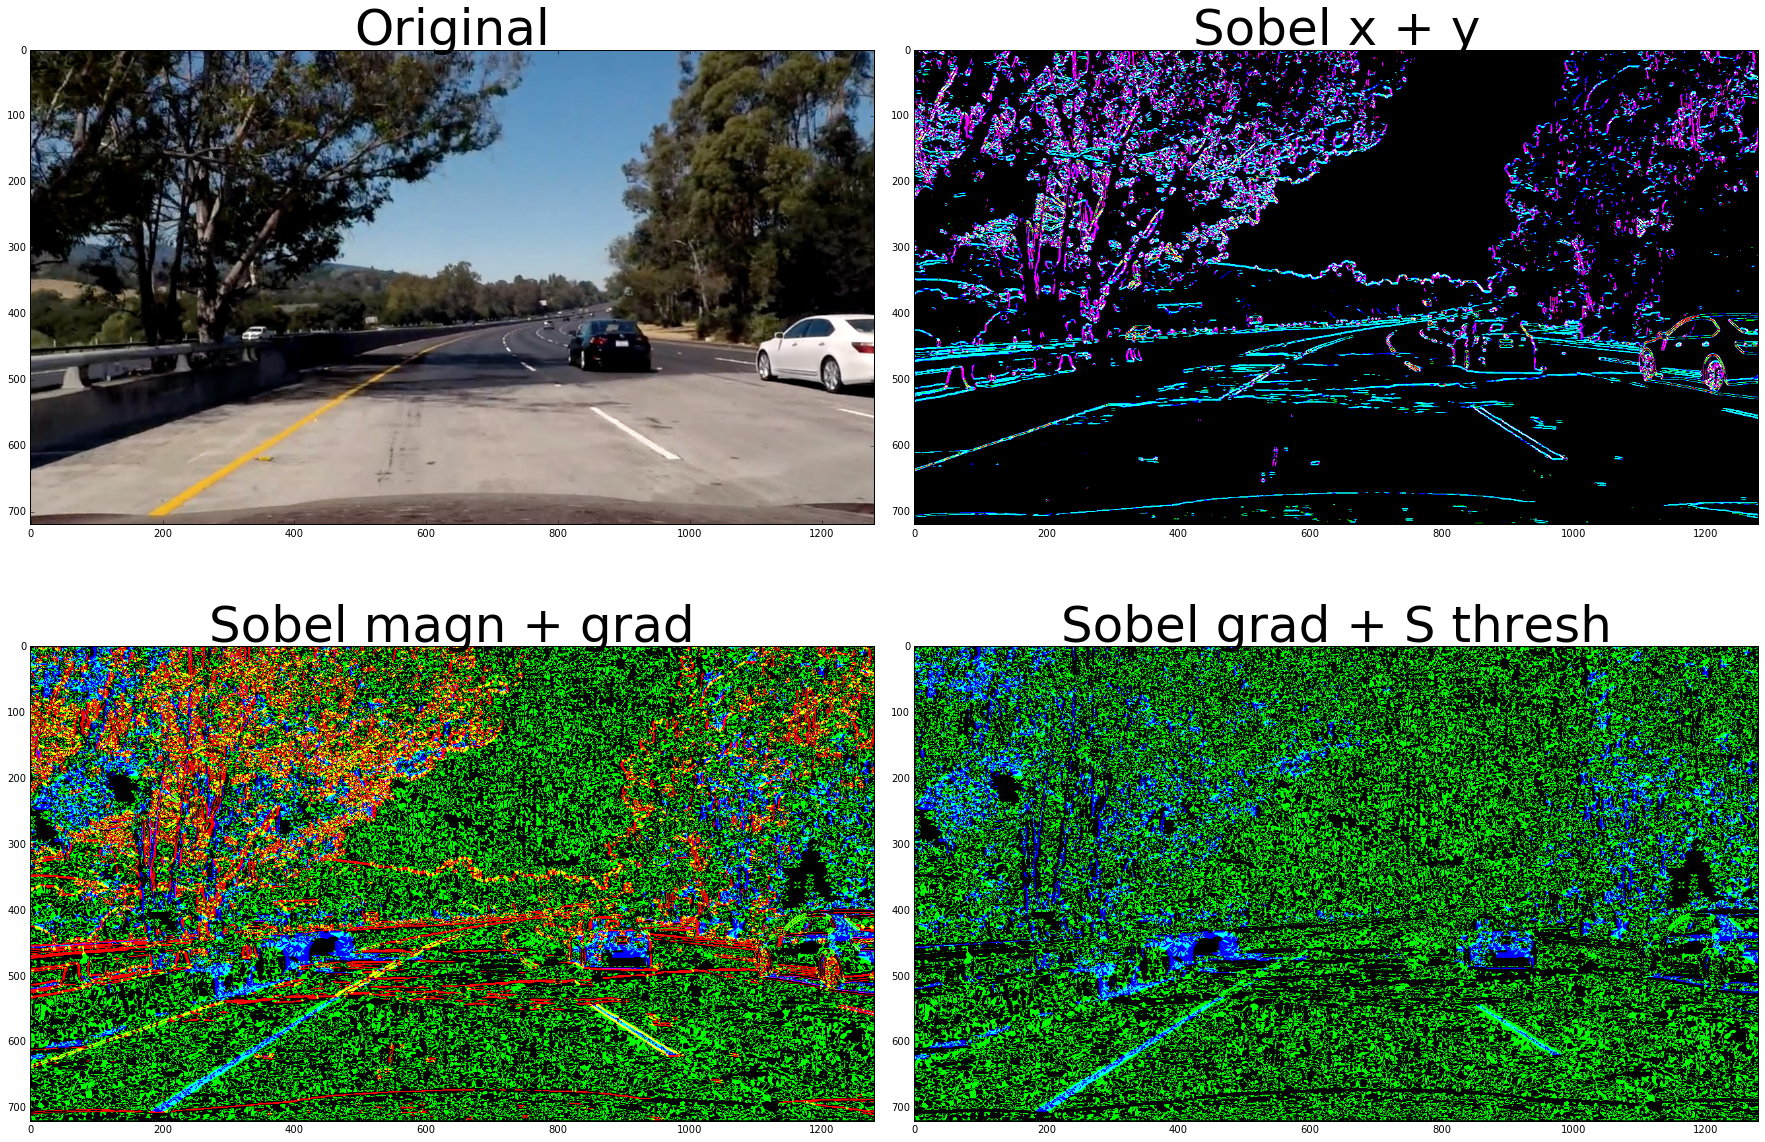

In [39]:
# Plot the result
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original', fontsize=50)
ax2.imshow(merge1)
ax2.set_title('Sobel x + y', fontsize=50)
ax3.imshow(merge2)
ax3.set_title('Sobel magn + grad', fontsize=50)
ax4.imshow(merge3)
ax4.set_title('Sobel grad + S thresh', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [43]:
# x gradient and S threshold
combined = np.zeros_like(sx_binary)
combined[(s_binary == 1) | (sx_binary == 1)] = 1

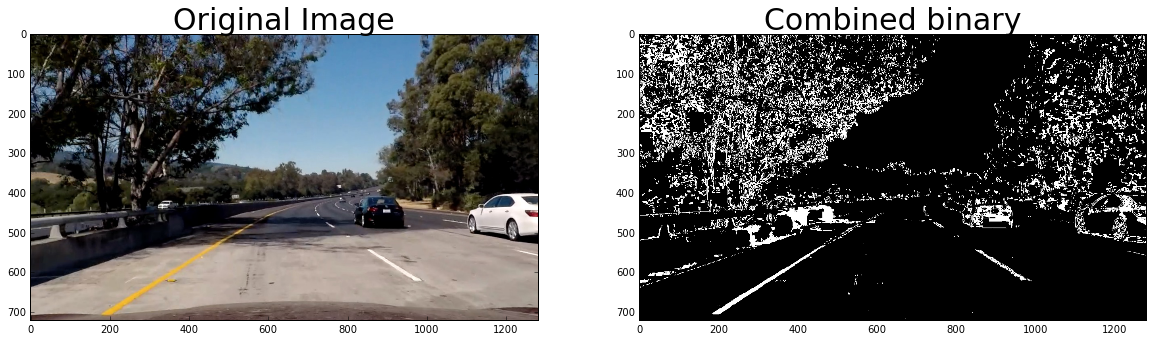

In [44]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(combined, cmap='gray');
ax2.set_title('Combined binary', fontsize=30);

In [47]:
# use previous combined, but add pixels where gradient magnitude and direction are activated
combined2 = np.copy(combined)
combined2[((smag_binary == 1) & (sgraddir_binary == 1))] = 1

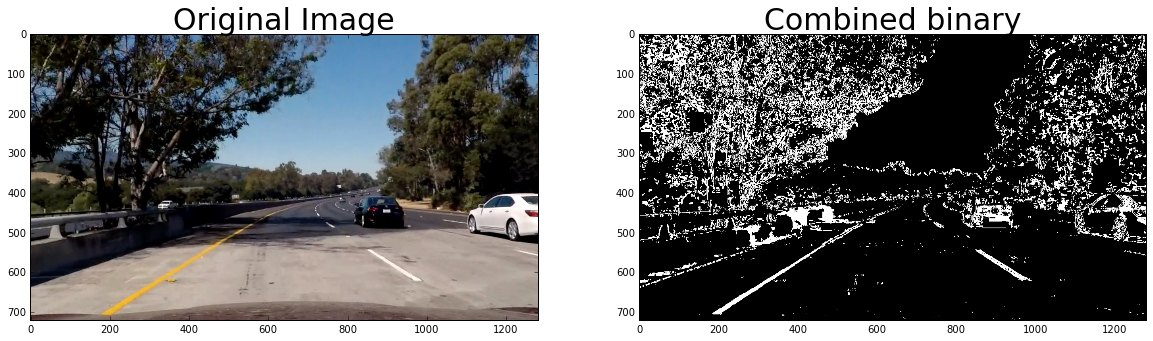

In [48]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(combined2, cmap='gray');
ax2.set_title('Combined binary', fontsize=30);

In [49]:
# y gradient and grad direction
combined3 = np.zeros_like(sy_binary)
combined3[(sy_binary == 1) & (sgraddir_binary == 1)] = 1

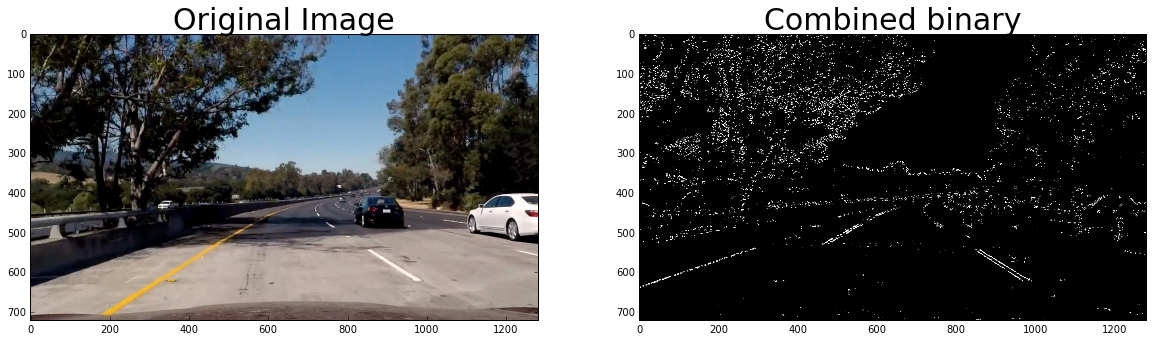

In [50]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(combined3, cmap='gray');
ax2.set_title('Combined binary', fontsize=30);

In [53]:
# combined2 OR combined3
combined4 = np.copy(combined2)
combined4[combined3 == 1] = 1

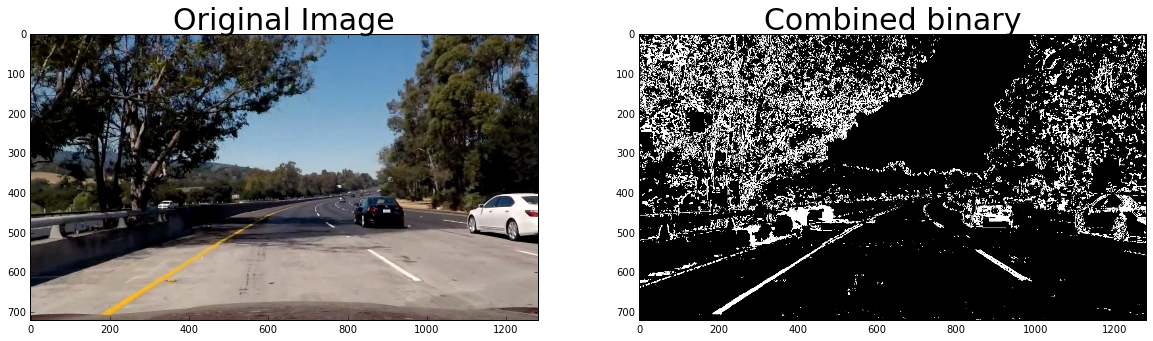

In [55]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(combined4, cmap='gray');
ax2.set_title('Combined binary', fontsize=30);

In [33]:
combined2 = np.zeros_like(sgraddir_binary) 
combined[((sx_binary == 1) & (sy_binary == 1)) | ((smag_binary == 1) & (sgraddir_binary == 1))] = 1

In [ ]:
# Once you have implemented a successful pipeline on the test images,
# you will run your algorithm on a video. 
# In the case of the video, you must search for the lane lines in the first few frames, and, 
# once you have a high-confidence detection, 
# use that information to track the position and curvature of the lines from frame to frame.